## POS Tagging

In [1]:
# Importing libraries
import nltk
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import re, pprint, time
import random
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize

## Data Preparation

Reading Treebank dataset of NLTK with the 'universal' tagset. 

#### Data
- For this assignment, we will use the Treebank dataset of NLTK with the 'universal' tagset. The Universal tagset of NLTK comprises only 12 coarse tag classes as follows: Verb, Noun, Pronouns, Adjectives, Adverbs, Adpositions, Conjunctions, Determiners, Cardinal Numbers, Particles, Other/ Foreign words, Punctuations.

 

- Note that using only 12 coarse classes (compared to the 46 fine classes such as NNP, VBD etc.) will make the Viterbi algorithm faster as well.

In [2]:
# Reading the Treebank tagged sentences
nltk_data = list(nltk.corpus.treebank.tagged_sents(tagset='universal'))

In [3]:
# First few tagged sentences
print(nltk_data[:10])

[[('Pierre', 'NOUN'), ('Vinken', 'NOUN'), (',', '.'), ('61', 'NUM'), ('years', 'NOUN'), ('old', 'ADJ'), (',', '.'), ('will', 'VERB'), ('join', 'VERB'), ('the', 'DET'), ('board', 'NOUN'), ('as', 'ADP'), ('a', 'DET'), ('nonexecutive', 'ADJ'), ('director', 'NOUN'), ('Nov.', 'NOUN'), ('29', 'NUM'), ('.', '.')], [('Mr.', 'NOUN'), ('Vinken', 'NOUN'), ('is', 'VERB'), ('chairman', 'NOUN'), ('of', 'ADP'), ('Elsevier', 'NOUN'), ('N.V.', 'NOUN'), (',', '.'), ('the', 'DET'), ('Dutch', 'NOUN'), ('publishing', 'VERB'), ('group', 'NOUN'), ('.', '.')], [('Rudolph', 'NOUN'), ('Agnew', 'NOUN'), (',', '.'), ('55', 'NUM'), ('years', 'NOUN'), ('old', 'ADJ'), ('and', 'CONJ'), ('former', 'ADJ'), ('chairman', 'NOUN'), ('of', 'ADP'), ('Consolidated', 'NOUN'), ('Gold', 'NOUN'), ('Fields', 'NOUN'), ('PLC', 'NOUN'), (',', '.'), ('was', 'VERB'), ('named', 'VERB'), ('*-1', 'X'), ('a', 'DET'), ('nonexecutive', 'ADJ'), ('director', 'NOUN'), ('of', 'ADP'), ('this', 'DET'), ('British', 'ADJ'), ('industrial', 'ADJ'), ('

##### Tagged sentences are in the form of a list of tuples where the first element of the tuple is a word and the second element is the POS tag of the word.

In [4]:
# Splitting into train and test
random.seed(1234)

train_set, test_set = train_test_split(nltk_data, test_size=0.05, random_state=42)

print(len(train_set))
print('\n')
print(len(test_set))
print('\n')
print(train_set[:10])

3718


196


[[('Bank', 'NOUN'), ('of', 'ADP'), ('New', 'NOUN'), ('England', 'NOUN'), ("'s", 'PRT'), ('shares', 'NOUN'), ('are', 'VERB'), ('traded', 'VERB'), ('*-1', 'X'), ('on', 'ADP'), ('the', 'DET'), ('New', 'NOUN'), ('York', 'NOUN'), ('Stock', 'NOUN'), ('Exchange', 'NOUN'), ('.', '.')], [('$', '.'), ('130', 'NUM'), ('million', 'NUM'), ('*U*', 'X'), ('of', 'ADP'), ('general', 'ADJ'), ('obligation', 'NOUN'), ('distributable', 'ADJ'), ('state', 'NOUN'), ('aid', 'NOUN'), ('bonds', 'NOUN'), ('due', 'ADJ'), ('1991-2000', 'NUM'), ('and', 'CONJ'), ('2009', 'NUM'), (',', '.'), ('tentatively', 'ADV'), ('priced', 'VERB'), ('*', 'X'), ('by', 'ADP'), ('a', 'DET'), ('Chemical', 'NOUN'), ('Securities', 'NOUN'), ('Inc.', 'NOUN'), ('group', 'NOUN'), ('*', 'X'), ('to', 'PRT'), ('yield', 'VERB'), ('from', 'ADP'), ('6.20', 'NUM'), ('%', 'NOUN'), ('in', 'ADP'), ('1991', 'NUM'), ('to', 'PRT'), ('7.272', 'NUM'), ('%', 'NOUN'), ('in', 'ADP'), ('2009', 'NUM'), ('.', '.')], [('``', '.'), ('They', 'PRON'), (

##### Getting list of tagged words

In [5]:
# Getting list of tagged words
train_tagged_words = [tup for sent in train_set for tup in sent]
print(len(train_tagged_words))
print('\n')
print(train_tagged_words[:100])

95589


[('Bank', 'NOUN'), ('of', 'ADP'), ('New', 'NOUN'), ('England', 'NOUN'), ("'s", 'PRT'), ('shares', 'NOUN'), ('are', 'VERB'), ('traded', 'VERB'), ('*-1', 'X'), ('on', 'ADP'), ('the', 'DET'), ('New', 'NOUN'), ('York', 'NOUN'), ('Stock', 'NOUN'), ('Exchange', 'NOUN'), ('.', '.'), ('$', '.'), ('130', 'NUM'), ('million', 'NUM'), ('*U*', 'X'), ('of', 'ADP'), ('general', 'ADJ'), ('obligation', 'NOUN'), ('distributable', 'ADJ'), ('state', 'NOUN'), ('aid', 'NOUN'), ('bonds', 'NOUN'), ('due', 'ADJ'), ('1991-2000', 'NUM'), ('and', 'CONJ'), ('2009', 'NUM'), (',', '.'), ('tentatively', 'ADV'), ('priced', 'VERB'), ('*', 'X'), ('by', 'ADP'), ('a', 'DET'), ('Chemical', 'NOUN'), ('Securities', 'NOUN'), ('Inc.', 'NOUN'), ('group', 'NOUN'), ('*', 'X'), ('to', 'PRT'), ('yield', 'VERB'), ('from', 'ADP'), ('6.20', 'NUM'), ('%', 'NOUN'), ('in', 'ADP'), ('1991', 'NUM'), ('to', 'PRT'), ('7.272', 'NUM'), ('%', 'NOUN'), ('in', 'ADP'), ('2009', 'NUM'), ('.', '.'), ('``', '.'), ('They', 'PRON'), ('were', 'V

##### Get tokens from train tagged words

In [6]:
# Tokens 
tokens = [pair[0] for pair in train_tagged_words]
tokens[:10]

['Bank', 'of', 'New', 'England', "'s", 'shares', 'are', 'traded', '*-1', 'on']

##### Create vocabulary

In [7]:
# Vocabulary
V = set(tokens)
print(len(V))

12109


##### Verify that number of tags is 12

In [8]:
# Number of tags
T = set([pair[1] for pair in train_tagged_words])
len(T)

12

##### Check all tags

In [9]:
print(T)

{'.', 'VERB', 'NOUN', 'ADJ', 'ADV', 'PRON', 'X', 'CONJ', 'ADP', 'DET', 'PRT', 'NUM'}


## Build the vanilla Viterbi based POS tagger

#### UDF for computing Emission Probability

In [10]:
# Compute word given tag : Emission Probability
def word_given_tag(word, tag, train_bag = train_tagged_words):
    tag_list = [pair for pair in train_bag if pair[1]==tag]
    count_tag = len(tag_list)
    w_given_tag_list = [pair[0] for pair in tag_list if pair[0]==word]
    count_w_given_tag = len(w_given_tag_list)
    
    return (count_w_given_tag, count_tag)

##### Testing Emission Probabilities udf

In [11]:
# Testing Emission Probabilities udf

# large
print("\n", "large")
print(word_given_tag('large', 'ADJ'))
print(word_given_tag('large', 'VERB'))
print(word_given_tag('large', 'NOUN'))

# will
print("\n", "will")
print(word_given_tag('will', 'ADJ'))
print(word_given_tag('will', 'VERB'))
print(word_given_tag('will', 'NOUN'))

# book
print("\n", "book")
print(word_given_tag('book', 'ADJ'))
print(word_given_tag('book', 'VERB'))
print(word_given_tag('book', 'NOUN'))


 large
(27, 6077)
(0, 12885)
(0, 27423)

 will
(0, 6077)
(268, 12885)
(1, 27423)

 book
(0, 6077)
(1, 12885)
(7, 27423)


#### UDF for computing Transition Probability

In [12]:
# Compute tag given tag: tag2 (t2) given tag1 (t1) : Transition Probability
def t2_given_t1(t2, t1, train_bag = train_tagged_words):
    tags = [pair[1] for pair in train_bag]
    count_t1 = len([t for t in tags if t==t1])
    count_t2_t1 = 0
    for index in range(len(tags)-1):
        if tags[index]==t1 and tags[index+1] == t2:
            count_t2_t1 += 1
    return (count_t2_t1, count_t1)

##### Testing Transition Probabilities udf

In [13]:
# Testing Transition Probabilities udf
print(t2_given_t1(t2='NOUN', t1='ADJ'))
print(t2_given_t1('NOUN', 'ADJ'))
print(t2_given_t1('NOUN', 'DET'))
print(t2_given_t1('NOUN', 'VERB'))
print(t2_given_t1('.', 'NOUN'))
print(t2_given_t1('PRON', 'PRON'))
print(t2_given_t1('VERB', 'NOUN'))

print('\n')

# Please note P(tag|start) is same as P(tag|'.')
print(t2_given_t1('DET', '.'))
print(t2_given_t1('VERB', '.'))
print(t2_given_t1('NOUN', '.'))
print(t2_given_t1('PRON', '.'))

(4234, 6077)
(4234, 6077)
(5302, 8284)
(1429, 12885)
(6559, 27423)
(21, 2618)
(4058, 27423)


(1929, 11118)
(984, 11118)
(2481, 11118)
(727, 11118)


#### Transition matrix of tags
- Now Compute the transition probabilities matrix and finally use the emission and the transition probabilities to write the Viterbi algorithm for tagging a given sequence of words.

In [14]:
# Creating t x t transition matrix of tags
# Each column is t2, each row is t1 thus M(i, j) represents P(tj given ti)

tags_matrix = np.zeros((len(T), len(T)), dtype='float32')
for i, t1 in enumerate(list(T)):
    for j, t2 in enumerate(list(T)): 
        tags_matrix[i, j] = t2_given_t1(t2, t1)[0]/t2_given_t1(t2, t1)[1]

tags_matrix

array([[9.38118398e-02, 8.85051265e-02, 2.23151639e-01, 4.49721180e-02,
        5.20777106e-02, 6.53894618e-02, 2.66234931e-02, 5.79240881e-02,
        9.11135077e-02, 1.73502430e-01, 2.33855005e-03, 8.05000886e-02],
       [3.53123769e-02, 1.69188976e-01, 1.10904150e-01, 6.46488145e-02,
        8.25766400e-02, 3.62436958e-02, 2.18005434e-01, 5.58789307e-03,
        9.04928222e-02, 1.33100510e-01, 3.11214589e-02, 2.28172299e-02],
       [2.39178792e-01, 1.47977978e-01, 2.64631867e-01, 1.22889541e-02,
        1.68836378e-02, 4.92287474e-03, 2.91361269e-02, 4.19356003e-02,
        1.76275387e-01, 1.33099956e-02, 4.38318215e-02, 9.62695573e-03],
       [6.53282851e-02, 1.23416157e-02, 6.96725368e-01, 6.66447282e-02,
        4.60753683e-03, 6.58219506e-04, 2.13921349e-02, 1.69491526e-02,
        7.89863393e-02, 5.10120112e-03, 1.08606219e-02, 2.04048045e-02],
       [1.36877075e-01, 3.44518274e-01, 3.08970101e-02, 1.30232558e-01,
        8.10631216e-02, 1.56146176e-02, 2.35880390e-02, 6.31

In [15]:
# Convert the matrix to a df for better readability
tags_df = pd.DataFrame(tags_matrix, columns = list(T), index=list(T))
tags_df

,.,VERB,NOUN,ADJ,ADV,PRON,X,CONJ,ADP,DET,PRT,NUM
.,0.093812,0.088505,0.223152,0.044972,0.052078,0.065389,0.026623,0.057924,0.091114,0.173502,0.002339,0.080500
VERB,0.035312,0.169189,0.110904,0.064649,0.082577,0.036244,0.218005,0.005588,0.090493,0.133101,0.031121,0.022817
NOUN,0.239179,0.147978,0.264632,0.012289,0.016884,0.004923,0.029136,0.041936,0.176275,0.013310,0.043832,0.009627
ADJ,0.065328,0.012342,0.696725,0.066645,0.004608,0.000658,0.021392,0.016949,0.078986,0.005101,0.010861,0.020405
ADV,0.136877,0.344518,0.030897,0.130233,0.081063,0.015615,0.023588,0.006312,0.119601,0.067110,0.013621,0.030565
PRON,0.041253,0.480901,0.211230,0.074866,0.033995,0.008021,0.092819,0.004966,0.022918,0.009549,0.012223,0.007257
X,0.163799,0.203633,0.061345,0.016571,0.025175,0.056087,0.076482,0.010357,0.142925,0.055131,0.185787,0.002709
CONJ,0.034256,0.153918,0.349132,0.116847,0.055842,0.058658,0.007977,0.000469,0.054435,0.121539,0.004693,0.042234
ADP,0.039486,0.008240,0.321776,0.105297,0.013162,0.069128,0.034029,0.000856,0.017228,0.326378,0.001498,0.062921
DET,0.017986,0.038387,0.640029,0.204973,0.012313,0.003742,0.045509,0.000483,0.009054,0.005311,0.000241,0.021970


##### Check probability of each tags.

In [16]:
tags_df.loc['.', :]

.       0.093812
VERB    0.088505
NOUN    0.223152
ADJ     0.044972
ADV     0.052078
PRON    0.065389
X       0.026623
CONJ    0.057924
ADP     0.091114
DET     0.173502
PRT     0.002339
NUM     0.080500
Name: ., dtype: float32

In [17]:
first_tag = tags_df.loc['.', :].index[0]
print(f'{first_tag} is the first tag on the current tag list')

. is the first tag on the current tag list


#### Heatmap of tags matrix

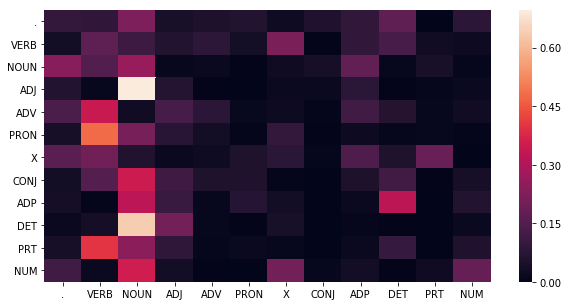

In [18]:
# Plot heatmap of tags matrix
# T(i, j) means P(tag j given tag i)
plt.figure(figsize=(10, 5))
sns.heatmap(tags_df)
plt.show()

#### Frequent tags

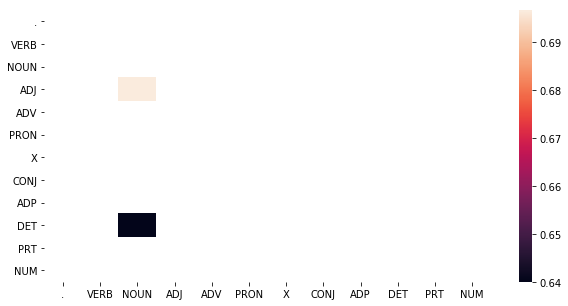

In [19]:
# Plot frequent tags
# Filter df to get P(t2, t1) > 0.5
tags_frequent = tags_df[tags_df>0.5]
plt.figure(figsize=(10, 5))
sns.heatmap(tags_frequent)
plt.show()

In [20]:
len(train_tagged_words)

95589

## Viterbi Algorithm

Let's now use the computed probabilities P(w, tag) and P(t2, t1) to assign tags to each word in the document. We'll run through each word w and compute P(tag/w)=P(w/tag).P(tag) for each tag in the tag set, and then assign the tag having the max P(tag/w).

We'll store the assigned tags in a list of tuples, similar to the list 'train_tagged_words'. Each tuple will be a (token, assigned_tag). As we progress further in the list, each tag to be assigned will use the tag of the previous token.

Note: P(tag|start) = P(tag|'.') 

#### To summarise, Viterbi algorithm works as follows:

For each word, we compute the P(tag|word) for each tag in the tag set and then assign the tag having the max P(tag/word).

P(tag|word)  = (emission probability of the word-tag pair) * (transition probability from the previous tag).

As we move along each word, we keep on storing the assigned tags in a list. As we progress further down the sequence, each word uses the tag of the previous token to compute the transition probabilities.

In [21]:
# Viterbi Heuristic
def Viterbi(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
    
    for key, word in enumerate(words):
        # Initialise list of probability column for a given observation
        p = [] 
        for tag in T:
            # Calculate Transition probability for each tag. 
            # For the first word of a sentence, compute P(tag|'.') 
            # and for the rest compute P(tag|previous_tag)
            if key == 0:
                transition_p = tags_df.loc['.', tag] #tag for the first word is calculated taking '.' as the previous tag
            else:
                transition_p = tags_df.loc[state[-1], tag]
                
            # Compute emission and state probabilities
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            state_probability = emission_p * transition_p    
            p.append(state_probability)
            
        pmax = max(p)
        # Getting state for which probability is maximum
        state_max = T[p.index(pmax)] 
        state.append(state_max)
    return list(zip(words, state))

#### Evaluating on Test Set

- Running on entire test dataset. 

In [22]:
# List of tagged words
test_run_base = [tup for sent in test_set for tup in sent]
test_run_base

[('For', 'ADP'),
 ('the', 'DET'),
 ('Agency', 'NOUN'),
 ('for', 'ADP'),
 ('International', 'NOUN'),
 ('Development', 'NOUN'),
 (',', '.'),
 ('appropriators', 'NOUN'),
 ('approved', 'VERB'),
 ('$', '.'),
 ('200', 'NUM'),
 ('million', 'NUM'),
 ('*U*', 'X'),
 ('in', 'ADP'),
 ('secondary', 'ADJ'),
 ('loan', 'NOUN'),
 ('guarantees', 'NOUN'),
 ('under', 'ADP'),
 ('an', 'DET'),
 ('expanded', 'VERB'),
 ('trade', 'NOUN'),
 ('credit', 'NOUN'),
 ('insurance', 'NOUN'),
 ('program', 'NOUN'),
 (',', '.'),
 ('and', 'CONJ'),
 ('total', 'ADJ'),
 ('loan', 'NOUN'),
 ('guarantees', 'NOUN'),
 ('for', 'ADP'),
 ('the', 'DET'),
 ('Overseas', 'NOUN'),
 ('Private', 'NOUN'),
 ('Investment', 'NOUN'),
 ('Corp.', 'NOUN'),
 ('are', 'VERB'),
 ('increased', 'VERB'),
 ('*-3', 'X'),
 ('by', 'ADP'),
 ('$', '.'),
 ('40', 'NUM'),
 ('million', 'NUM'),
 ('*U*', 'X'),
 ('over', 'ADP'),
 ('fiscal', 'ADJ'),
 ('1989', 'NUM'),
 ('as', 'ADP'),
 ('part', 'NOUN'),
 ('of', 'ADP'),
 ('the', 'DET'),
 ('same', 'ADJ'),
 ('Poland', 'NOUN'

In [23]:
# List of untagged words
test_tagged_words = [tup[0] for sent in test_set for tup in sent]
test_tagged_words

['For',
 'the',
 'Agency',
 'for',
 'International',
 'Development',
 ',',
 'appropriators',
 'approved',
 '$',
 '200',
 'million',
 '*U*',
 'in',
 'secondary',
 'loan',
 'guarantees',
 'under',
 'an',
 'expanded',
 'trade',
 'credit',
 'insurance',
 'program',
 ',',
 'and',
 'total',
 'loan',
 'guarantees',
 'for',
 'the',
 'Overseas',
 'Private',
 'Investment',
 'Corp.',
 'are',
 'increased',
 '*-3',
 'by',
 '$',
 '40',
 'million',
 '*U*',
 'over',
 'fiscal',
 '1989',
 'as',
 'part',
 'of',
 'the',
 'same',
 'Poland',
 'package',
 '.',
 'The',
 'market',
 'is',
 'just',
 'becoming',
 'more',
 'efficient',
 '.',
 "''",
 'Moscow',
 'has',
 'settled',
 'pre-1917',
 'debts',
 'with',
 'other',
 'countries',
 'in',
 'recent',
 'years',
 'at',
 'less',
 'than',
 'face',
 'value',
 '.',
 '``',
 'Unemployment',
 'continues',
 'at',
 'a',
 'relatively',
 'low',
 'level',
 ',',
 '*',
 'providing',
 'a',
 'sense',
 'of',
 'job',
 'security',
 ',',
 'and',
 'a',
 'low',
 'inflation',
 'rate',
 '

##### Tag sentences in the test dataset

In [24]:
# Tagging the test sentences
start = time.time()
tagged_seq = Viterbi(test_tagged_words)
end = time.time()
difference = end-start

print("Time taken in seconds: ", difference)
print('\n')
print(tagged_seq)

Time taken in seconds:  976.7427740097046


[('For', 'ADP'), ('the', 'DET'), ('Agency', 'NOUN'), ('for', 'ADP'), ('International', 'NOUN'), ('Development', 'NOUN'), (',', '.'), ('appropriators', 'NOUN'), ('approved', 'VERB'), ('$', '.'), ('200', 'NUM'), ('million', 'NUM'), ('*U*', 'X'), ('in', 'ADP'), ('secondary', 'ADJ'), ('loan', 'NOUN'), ('guarantees', 'NOUN'), ('under', 'ADP'), ('an', 'DET'), ('expanded', 'VERB'), ('trade', 'VERB'), ('credit', 'NOUN'), ('insurance', 'NOUN'), ('program', 'NOUN'), (',', '.'), ('and', 'CONJ'), ('total', 'ADJ'), ('loan', 'NOUN'), ('guarantees', 'NOUN'), ('for', 'ADP'), ('the', 'DET'), ('Overseas', '.'), ('Private', 'ADJ'), ('Investment', 'NOUN'), ('Corp.', 'NOUN'), ('are', 'VERB'), ('increased', 'VERB'), ('*-3', 'X'), ('by', 'ADP'), ('$', '.'), ('40', 'NUM'), ('million', 'NUM'), ('*U*', 'X'), ('over', 'ADP'), ('fiscal', 'ADJ'), ('1989', 'NUM'), ('as', 'ADP'), ('part', 'NOUN'), ('of', 'ADP'), ('the', 'DET'), ('same', 'ADJ'), ('Poland', 'NOUN'), ('packag

#### Evaluate accuracy of the Viterbi algorithm on the test dataset. 

In [25]:
# Accuracy
check = [i for i, j in zip(tagged_seq, test_run_base) if i == j] 

accuracy = len(check)/len(tagged_seq)

print(f'Accuracy is ~ {round(accuracy*100, 2)}%')

Accuracy is ~ 91.39%


#### Check incorrectly tagged cases

In [26]:
incorrect_tagged_cases = [[test_run_base[i-1],j] for i, j in enumerate(zip(tagged_seq, test_run_base)) if j[0]!=j[1]]
incorrect_tagged_cases

[[('expanded', 'VERB'), (('trade', 'VERB'), ('trade', 'NOUN'))],
 [('the', 'DET'), (('Overseas', '.'), ('Overseas', 'NOUN'))],
 [('Overseas', 'NOUN'), (('Private', 'ADJ'), ('Private', 'NOUN'))],
 [('settled', 'VERB'), (('pre-1917', '.'), ('pre-1917', 'ADJ'))],
 [('``', '.'), (('Unemployment', '.'), ('Unemployment', 'NOUN'))],
 [('the', 'DET'), (('purchasing', 'NOUN'), ('purchasing', 'VERB'))],
 [('weekly', 'ADJ'), (('paycheck', '.'), ('paycheck', 'NOUN'))],
 [('paycheck', 'NOUN'), (('reasonably', '.'), ('reasonably', 'ADV'))],
 [(',', '.'), (('though', 'ADP'), ('though', 'ADV'))],
 [('such', 'ADJ'), (('close', 'NOUN'), ('close', 'ADJ'))],
 [('acquiring', 'VERB'), (('more', 'ADV'), ('more', 'ADJ'))],
 [('*-1', 'X'), (('Funded', '.'), ('Funded', 'VERB'))],
 [('from', 'ADP'), (('Tokio', '.'), ('Tokio', 'NOUN'))],
 [('medical', 'ADJ'), (('protocols', '.'), ('protocols', 'NOUN'))],
 [('on', 'ADP'), (('preventative', '.'), ('preventative', 'ADJ'))],
 [('it', 'PRON'), (('existed', '.'), ('exi

#### Testing with a different sentence

In [27]:
# Testing
sentence_test = 'Twitter is the best networking social site. Man is a social animal. Data science is an emerging field. Data science jobs are high in demand.'
words = word_tokenize(sentence_test)

start = time.time()
tagged_seq_test1 = Viterbi(words)
end = time.time()
difference = end-start

print('Time Taken in seconds = ', difference)
print('\n')
print(tagged_seq_test1)
print('\n')
list_wrong = set([tup [0] for tup in tagged_seq_test1 if tup[1] == first_tag])
print("List of words wrongly tagged:")
print(list_wrong)

Time Taken in seconds =  4.747308254241943


[('Twitter', '.'), ('is', 'VERB'), ('the', 'DET'), ('best', 'ADJ'), ('networking', 'NOUN'), ('social', 'ADJ'), ('site', '.'), ('.', '.'), ('Man', 'NOUN'), ('is', 'VERB'), ('a', 'DET'), ('social', 'ADJ'), ('animal', '.'), ('.', '.'), ('Data', 'NOUN'), ('science', '.'), ('is', 'VERB'), ('an', 'DET'), ('emerging', 'VERB'), ('field', 'NOUN'), ('.', '.'), ('Data', 'NOUN'), ('science', '.'), ('jobs', 'NOUN'), ('are', 'VERB'), ('high', 'ADJ'), ('in', 'ADP'), ('demand', 'NOUN'), ('.', '.')]


List of words wrongly tagged:
{'Twitter', 'animal', '.', 'science', 'site'}


#### Vanilla Viterbi algorithm gave us approximately 91% accuracy. The 9% loss of accuracy, to a large part, can be attributed to the fact that when the algorithm hits an unknown word (i.e. not present in the training set), it naively assigns the first tag in the list of tags that we have created. 

In [28]:
print(f'In this case, the first tag happens to be {first_tag}, so it assigns {first_tag} to all unknown words.')

In this case, the first tag happens to be ., so it assigns . to all unknown words.


#### Load provided Test Sentences file

In [29]:
test_sentences = pd.read_csv('Test_sentences.txt', sep="\n", header=None)
pd.set_option('display.max_colwidth', max(5, len(max(test_sentences[0], key=len)) + 10))
test_sentences

,0
0,Android is a mobile operating system developed by Google.
1,Android has been the best-selling OS worldwide on smartphones since 2011 and on tablets since 2013.
2,Google and Twitter made a deal in 2015 that gave Google access to Twitter's firehose.
3,Twitter is an online news and social networking service on which users post and interact with messages known as tweets.
4,"Before entering politics, Donald Trump was a domineering businessman and a television personality."
5,"The 2018 FIFA World Cup is the 21st FIFA World Cup, an international football tournament contested once every four years."
6,This is the first World Cup to be held in Eastern Europe and the 11th time that it has been held in Europe.
7,Show me the cheapest round trips from Dallas to Atlanta
8,I would like to see flights from Denver to Philadelphia.
9,Show me the price of the flights leaving Atlanta at about 3 in the afternoon and arriving in San Francisco.


###### Test loaded sentences

In [30]:
# Testing loaded sentences with vanilla viterbi algorithm
for sentence_test in test_sentences[0]:
    print(sentence_test)
    words = word_tokenize(sentence_test)
    start = time.time()
    tagged_seq_tests = Viterbi(words)
    end = time.time()
    difference = end-start
    print(tagged_seq_tests)
    print('Time Taken in seconds = ', difference, '\n')

Android is a mobile operating system developed by Google.
[('Android', '.'), ('is', 'VERB'), ('a', 'DET'), ('mobile', 'ADJ'), ('operating', 'NOUN'), ('system', 'NOUN'), ('developed', 'VERB'), ('by', 'ADP'), ('Google', '.'), ('.', '.')]
Time Taken in seconds =  1.7054064273834229 

Android has been the best-selling OS worldwide on smartphones since 2011 and on tablets since 2013.
[('Android', '.'), ('has', 'VERB'), ('been', 'VERB'), ('the', 'DET'), ('best-selling', 'ADJ'), ('OS', '.'), ('worldwide', '.'), ('on', 'ADP'), ('smartphones', '.'), ('since', 'ADP'), ('2011', '.'), ('and', 'CONJ'), ('on', 'ADP'), ('tablets', 'NOUN'), ('since', 'ADP'), ('2013', '.'), ('.', '.')]
Time Taken in seconds =  3.5564041137695312 

Google and Twitter made a deal in 2015 that gave Google access to Twitter's firehose.
[('Google', '.'), ('and', 'CONJ'), ('Twitter', '.'), ('made', 'VERB'), ('a', 'DET'), ('deal', 'NOUN'), ('in', 'ADP'), ('2015', '.'), ('that', 'DET'), ('gave', 'VERB'), ('Google', '.'), ('acc

### Listing down unknown words which are incorrectly tagged by Viterbi POS tagger  as per test sentences

- Sentence 1  - 'Android', 'Google'
- Sentence 2  - 'Android', 'OS', 'worldwide', 'smartphones', '2011', '2013'
- Sentence 3  - 'Google', 'Twitter', '2015', 'firehose'
- Sentence 4  - 'Twitter', 'online', 'interact', 'messages', 'tweets'
- Sentence 5  - 'domineering', 'personality'
- Sentence 6  - '2018', 'Cup', '21st', 'FIFA', 'tournament', 'contested'
- Sentence 8  - 'trips'
- Sentence 10 - 'arriving' 
- Sentence 11 - 'NASA', 'invited','ICESAT-2', 'Satellite'

In [31]:
# Display all uknown and known words for test sentences
all_unknown_words = []
all_known_words = []
for sentence_test in test_sentences[0]:
    words = word_tokenize(sentence_test)
    unknown_words = [word for word in words if word not in V]
    known_words = [word for word in words if word in V]
    all_unknown_words.append(unknown_words)
    all_known_words.append(known_words)

final_unknown_words = [word for list1 in all_unknown_words for word in list1]
print("List of unknown words (not found in vocabulary):")
print(sorted(set(final_unknown_words)))

print('\n')
print("List of known words (found in vocabulary):")
final_known_words = [word for list1 in all_known_words for word in list1]
print(sorted(set(final_known_words)))

List of unknown words (not found in vocabulary):
['2011', '2013', '2015', '2018', '21st', 'Android', 'Cup', 'FIFA', 'Google', 'ICESAT-2', 'NASA', 'OS', 'Satellite', 'Twitter', 'arriving', 'contested', 'domineering', 'firehose', 'interact', 'invited', 'messages', 'online', 'personality', 'smartphones', 'tournament', 'trips', 'tweets', 'worldwide']


List of known words (found in vocabulary):
["'s", ',', '.', '11th', '3', 'Atlanta', 'Before', 'Dallas', 'Denver', 'Donald', 'Eastern', 'Europe', 'Francisco', 'I', 'Philadelphia', 'San', 'Show', 'The', 'This', 'Trump', 'World', 'a', 'about', 'access', 'afternoon', 'an', 'and', 'as', 'at', 'be', 'been', 'best-selling', 'businessman', 'by', 'cheapest', 'deal', 'developed', 'entering', 'every', 'experience', 'first', 'flights', 'football', 'four', 'from', 'gave', 'has', 'held', 'in', 'international', 'is', 'it', 'known', 'launch', 'leaving', 'like', 'made', 'me', 'media', 'mobile', 'networking', 'news', 'of', 'on', 'once', 'operating', 'politics

#### Vanilla Viterbi algorithm is not effectively tagging most of the uknown words, as we have seen above.

#### Lets do an EDA to undetstand the relationships in training data. Then we can try lexicon, rule-based or probabilistic approaches to improve Viterbi algorithm.

### Exploratory Analysis of training data

Let's now conduct some basic exploratory analysis to understand the tagged corpus. To start with, let's ask some simple questions:
- 1. How many unique tags are there in the corpus? 
- 2. Which is the most frequent tag in the corpus?
- 3. Which tag is most commonly assigned to the word 'World'

In [32]:
# Find the number of unique POS tags in the corpus
tags = [pair[1] for pair in train_tagged_words]
unique_tags = set(tags)
len(unique_tags)

12

In [33]:
# Which is the most frequent tag in the corpus
from collections import Counter
tag_counts = Counter(tags)
tag_counts

Counter({'NOUN': 27423,
         'ADP': 9345,
         'PRT': 3059,
         'VERB': 12885,
         'X': 6276,
         'DET': 8284,
         '.': 11118,
         'NUM': 3363,
         'ADJ': 6077,
         'CONJ': 2131,
         'ADV': 3010,
         'PRON': 2618})

In [34]:
# Most common tags can be seen using the most_common() method of Counter
tag_counts.most_common()

[('NOUN', 27423),
 ('VERB', 12885),
 ('.', 11118),
 ('ADP', 9345),
 ('DET', 8284),
 ('X', 6276),
 ('ADJ', 6077),
 ('NUM', 3363),
 ('PRT', 3059),
 ('ADV', 3010),
 ('PRON', 2618),
 ('CONJ', 2131)]

In [35]:
# Which tag is most commonly assigned to the word 'World' 
world = Counter([pair for pair in train_tagged_words if pair[0].lower() == 'world'])
world

Counter({('world', 'NOUN'): 22, ('World', 'NOUN'): 15})

### Exploratory Analysis Contd.

Let's now try observing some rules which can potentially be used for POS tagging. 

To start with, let's see if the following questions reveal something useful:

- 4. What fraction of words with the tag 'VBD' (verb, past tense) end with the letters 'ed'
- 5. What fraction of words with the tag 'VBG' (verb, present participle/gerund) end with the letters 'ing'
- 6. How many words starts with digit and end with 'th'
- 7. How many words starts with digit and end with 'st'

In [36]:
# How many words with the tag 'VERB' end with 'ed'
past_tense_verbs = [pair for pair in train_tagged_words if pair[1]=='VERB']
ed_verbs = [pair for pair in past_tense_verbs if pair[0].endswith('ed')]
print(len(ed_verbs) / len(past_tense_verbs))
ed_verbs[:20]

0.2060535506402794


[('traded', 'VERB'),
 ('priced', 'VERB'),
 ('treated', 'VERB'),
 ('reported', 'VERB'),
 ('recorded', 'VERB'),
 ('viewed', 'VERB'),
 ('expected', 'VERB'),
 ('delivered', 'VERB'),
 ('resigned', 'VERB'),
 ('obtained', 'VERB'),
 ('cited', 'VERB'),
 ('agreed', 'VERB'),
 ('changed', 'VERB'),
 ('occurred', 'VERB'),
 ('recouped', 'VERB'),
 ('remained', 'VERB'),
 ('skipped', 'VERB'),
 ('automated', 'VERB'),
 ('slipped', 'VERB'),
 ('continued', 'VERB')]

In [37]:
# How many words with the tag 'VERB' end with 'ing'
participle_verbs = [pair for pair in train_tagged_words if pair[1]=='VERB']
ing_verbs = [pair for pair in participle_verbs if pair[0].endswith('ing')]
print(len(ing_verbs) / len(participle_verbs))
ing_verbs[:20]

0.10710128055878929


[('turning', 'VERB'),
 ('booming', 'VERB'),
 ('growing', 'VERB'),
 ('succeeding', 'VERB'),
 ('retiring', 'VERB'),
 ('keeping', 'VERB'),
 ('increasing', 'VERB'),
 ('fighting', 'VERB'),
 ('eating', 'VERB'),
 ('drinking', 'VERB'),
 ('regarding', 'VERB'),
 ('running', 'VERB'),
 ('facing', 'VERB'),
 ('following', 'VERB'),
 ('initialing', 'VERB'),
 ('amending', 'VERB'),
 ('introducing', 'VERB'),
 ('starting', 'VERB'),
 ('prosecuting', 'VERB'),
 ('being', 'VERB')]

In [38]:
# How many words starts with digit and end with 'th'
digit_words = [pair for pair in train_tagged_words if pair[0].startswith(('0', '1', '2', '3', '4', '5', '6', '7', '8', '9'))]
th_words = [pair for pair in digit_words if pair[0].endswith('th')]
print(len(th_words) / len(digit_words))
th_words[:20]

0.0013865779256794233


[('10th', 'ADJ'),
 ('11th', 'ADJ'),
 ('84-month', 'ADJ'),
 ('1\\/10th', 'NOUN'),
 ('21-month', 'ADJ')]

In [39]:
# How many words starts with digit and end with 'st'
st_words = [pair for pair in digit_words if pair[0].endswith('st')]
print(len(st_words) / len(digit_words))
st_words[:20]

0.00027731558513588466


[('1st', 'NUM')]

### Exploratory Analysis Contd.

Let's now try observing some tag patterns using the fact the some tags are more likely to appear after certain other tags. For e.g. most nouns NOUN are usually followed by determiners DET ("The/DET constitution/NOUN"), adjectives ADJ usually precede a noun NOUN ("A large/ADJ building/NOUN") etc. 

- 8. What fraction of adjectives ADJ are followed by a noun NOUN? 
- 9. What fraction of determiners DET are followed by a noun NOUN?

In [40]:
# Fraction of adjectives ADJ are followed by a noun NOUN

# Create a list of all tags (without the words)

tags = [pair[1] for pair in train_tagged_words]

# Create a list of ADJ tags
ADJ_tags = [t for t in tags if t == 'ADJ']

# Create a list of (ADJ, NOUN) tags
ADJ_NN_tags = [(t, tags[index+1]) for index, t in enumerate(tags) 
              if t=='ADJ' and tags[index+1]=='NOUN']

print(len(ADJ_tags))
print(len(ADJ_NN_tags))
print(len(ADJ_NN_tags) / len(ADJ_tags))

6077
4234
0.696725357906862


In [41]:
# Fraction of determiners DET are followed by a noun NOUN

# Create a list of DET tags

DET_tags = [t for t in tags if t == 'DET']

# Create a list of (DET, NOUN) tags
DET_NN_tags = [(t, tags[index+1]) for index, t in enumerate(tags) 
              if t=='DET' and tags[index+1]=='NOUN']

print(len(DET_tags))
print(len(DET_NN_tags))
print(len(DET_NN_tags) / len(DET_tags))

8284
5302
0.6400289715113472


## Solve the problem of unknown words

*First let's analyse Why does the Viterbi algorithm choose a random tag on encountering an unknown word?*

##### Lets rewrite the vanilla algorithm with debug messages to find the issue.

In [42]:
# Viterbi Heuristic with debug messages for analysis
def ViterbiDebug(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
    for key, word in enumerate(words):
        # Initialise list of probability column for a given observation
        p = [] 
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]
            
            # Compute emission and state probabilities
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            state_probability = emission_p * transition_p 
            print('key = ', key, 'word =', word, 'tag = ', tag, 'transition_p = ', transition_p,
                  'emission_p = ', emission_p, 'state_probability = ', state_probability)
            p.append(state_probability)
            
        pmax = max(p)
        # Getting state for which probability is maximum
        state_max = T[p.index(pmax)] 
        state.append(state_max)
        print('pmax = ', pmax, 'state_max = ', state_max)
    return list(zip(words, state))

##### Lets test our debug enabled algorithm with sentence which has words 'google, twitter and 2015' which was found to be unknown in previous test cases.

In [43]:
sentence_test = "Google and Twitter made a deal in 2015 that gave Google access to Twitter's firehose."
print(sentence_test)
print('\n')
words = word_tokenize(sentence_test)
tagged_seq_debug = ViterbiDebug(words)
print(tagged_seq_debug)

Google and Twitter made a deal in 2015 that gave Google access to Twitter's firehose.


key =  0 word = Google tag =  . transition_p =  0.09381184 emission_p =  0.0 state_probability =  0.0
key =  0 word = Google tag =  VERB transition_p =  0.08850513 emission_p =  0.0 state_probability =  0.0
key =  0 word = Google tag =  NOUN transition_p =  0.22315164 emission_p =  0.0 state_probability =  0.0
key =  0 word = Google tag =  ADJ transition_p =  0.044972118 emission_p =  0.0 state_probability =  0.0
key =  0 word = Google tag =  ADV transition_p =  0.05207771 emission_p =  0.0 state_probability =  0.0
key =  0 word = Google tag =  PRON transition_p =  0.06538946 emission_p =  0.0 state_probability =  0.0
key =  0 word = Google tag =  X transition_p =  0.026623493 emission_p =  0.0 state_probability =  0.0
key =  0 word = Google tag =  CONJ transition_p =  0.057924088 emission_p =  0.0 state_probability =  0.0
key =  0 word = Google tag =  ADP transition_p =  0.09111351 emission_p =  0.

key =  6 word = in tag =  NOUN transition_p =  0.26463187 emission_p =  3.646574043685957e-05 state_probability =  9.649996988249004e-06
key =  6 word = in tag =  ADJ transition_p =  0.012288954 emission_p =  0.0 state_probability =  0.0
key =  6 word = in tag =  ADV transition_p =  0.016883638 emission_p =  0.000664451827242525 state_probability =  1.1218363957547667e-05
key =  6 word = in tag =  PRON transition_p =  0.0049228747 emission_p =  0.0 state_probability =  0.0
key =  6 word = in tag =  X transition_p =  0.029136127 emission_p =  0.0 state_probability =  0.0
key =  6 word = in tag =  CONJ transition_p =  0.0419356 emission_p =  0.0 state_probability =  0.0
key =  6 word = in tag =  ADP transition_p =  0.17627539 emission_p =  0.15719636169074372 state_probability =  0.027709849555904435
key =  6 word = in tag =  DET transition_p =  0.013309996 emission_p =  0.0 state_probability =  0.0
key =  6 word = in tag =  PRT transition_p =  0.04383182 emission_p =  0.0045766590389016

key =  13 word = Twitter tag =  PRON transition_p =  0.018960444 emission_p =  0.0 state_probability =  0.0
key =  13 word = Twitter tag =  X transition_p =  0.013403073 emission_p =  0.0 state_probability =  0.0
key =  13 word = Twitter tag =  CONJ transition_p =  0.0022883294 emission_p =  0.0 state_probability =  0.0
key =  13 word = Twitter tag =  ADP transition_p =  0.021575678 emission_p =  0.0 state_probability =  0.0
key =  13 word = Twitter tag =  DET transition_p =  0.1003596 emission_p =  0.0 state_probability =  0.0
key =  13 word = Twitter tag =  PRT transition_p =  0.0016345211 emission_p =  0.0 state_probability =  0.0
key =  13 word = Twitter tag =  NUM transition_p =  0.058515854 emission_p =  0.0 state_probability =  0.0
pmax =  0.0 state_max =  .
key =  14 word = 's tag =  . transition_p =  0.09381184 emission_p =  0.0 state_probability =  0.0
key =  14 word = 's tag =  VERB transition_p =  0.08850513 emission_p =  0.007372914241365929 state_probability =  0.00065254

###### Observations
- Its been observed that unknown words belong to the first tag in the list of tags from training bag.
- For unknown words the emission probablity is 0 hence the state probability will become 0 as (state probability = transition probability * emission probablity).
- Since all the state probability is 0 the pmax will be 0 and hence the index of list T will be 0 and the first one in the list will be selected as the tag. 

### Viterbi Modification-Technique-1

- *Modify the Viterbi algorithm so that it considers only one of the transition or emission probabilities for unknown words.*

#### Solution - For unknown words, set state probability as most frequent tag in corpus

Change the code as given below
- *If maximum state probablity is 0.0 then use the maximum transition probability to get most frequent tag in corpus.*

##### Modified Algorithm as per the above solution

In [44]:
# Viterbi Heuristic with unknown word handling version 1 
def Viterbi_v1(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
    
    for key, word in enumerate(words):
        # Initialise list of probability column for a given observation
        p = []
        trans_prob = []
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]
                
            # Compute emission and state probabilities
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            state_probability = emission_p * transition_p  
            
            # Add the state probablitiy to list of probablities
            # we will take the maximum probablity from this collection
            p.append(state_probability)
            
            # Add the transition probablity to a list 
            # In the case of unknown words this will be
            # used to set max transition probability as state probability.
            trans_prob.append(transition_p)
            
        pmax = max(p)
        
        # getting state for which probability is maximum
        if pmax == 0.0: # Handle unknown words
            state_max = T[trans_prob.index(max(trans_prob))]
        else:
            state_max = T[p.index(pmax)]
        
        state.append(state_max)
    return list(zip(words, state))

##### Run a simple test case first

In [45]:
sentence_test = "Google and Twitter made a deal in 2015 that gave Google access to Twitter's firehose."
print(sentence_test)

words = word_tokenize(sentence_test)
tagged_seq_v1 = Viterbi_v1(words)
print('\n')
print(tagged_seq_v1)

Google and Twitter made a deal in 2015 that gave Google access to Twitter's firehose.


[('Google', 'NOUN'), ('and', 'CONJ'), ('Twitter', 'NOUN'), ('made', 'VERB'), ('a', 'DET'), ('deal', 'NOUN'), ('in', 'ADP'), ('2015', 'DET'), ('that', 'ADP'), ('gave', 'VERB'), ('Google', 'X'), ('access', 'NOUN'), ('to', 'PRT'), ('Twitter', 'VERB'), ("'s", 'PRT'), ('firehose', 'VERB'), ('.', '.')]


 The above change, solved random tagging of unknown words by using transition probability.
 - But as you have observed it assigned the most frequent tag from the training corpus which is NOUN.
 - In order to improve the accuracy we have to assign tag's based on the relationship between words, let's proceed to technique 2 for the same.

### Viterbi Modification - Technique - 2

Now lets improve the unknown word tagging of Viterbi algorithm by:
- *Creating a Rule-Based (Regular Expression) Tagger.*

**Note:**-*I tried using bigram tagger backed off by unigram tagger backed off by regexp tagger and did not see much benefit. I also tried unigram tagger backed off by regexp tagger and again did not see much benefit. Finally decided upon on use of only regexp tagger directly.*

#### Rule-Based (Regular Expression) Tagger

###### Identify rules (e.g. based on morphological cues) that can be used to tag unknown words.

In [46]:
# Specify patterns for tagging
patterns = [
    (r'(\bone|\btwo|\bthree|\bfour|\bfive|\bsix|\bseven|\beight|\bnine|\bten)', 'NUM'),  # number like
    (r'(\beleven|\btwelve|\bthirteen|\bfourteen|\bfifteen|\bsixteen|\bseventeen|\beighteen|\bnineteen)', 'NUM'), # number like
    (r'(\bten|\btwenty|\bthirty|\bforty|\bfifty|\bsixty|\bseventy|\beighty|\bninety|\bhundred)', 'NUM'),  # number like
    (r'(\bthousand|\bmillion|\bbillion|\btrillion|\bquadrillion|\bquintillion|\bsextillion)', 'NUM'),  # number like
    (r'(\bseptillion|\boctillion|\bnonillion|\bdecillion|\bundecillion|\bduodecillion)', 'NUM'),  # number like
    (r'(\btredecillion|\bquattuordecillion|\bsexdecillion|\bseptendecillion|\boctodecillion)', 'NUM'),  # number like
    (r'(\bnovemdecillion|\bvigintillion)', 'NUM'),  # number like
    (r'.*ing$', 'VERB'),                                                # gerund
    (r'.*ed$', 'VERB'),                                                 # past tense
    (r'.*es$', 'VERB'),                                                 # 3rd singular present
    (r'.*ould$', 'VERB'),                                               # modals
    (r'.*(ate\b|fy\b|ize\b)', 'VERB'),                                  # verb like
    (r'(\ben|\bem).*', 'VERB'),                                         # verb like
    (r'.*ness$', 'NOUN'),                                               # nouns formed from adjectives
    (r'.*(ion\b|ty\b|ics\b|ment\b|ence\b|ance\b|ist\b|ism\b)', 'NOUN'), # noun Like
    (r'.*\'s$', 'NOUN'),                                                # possessive nouns
    (r'.*s$', 'NOUN'),                                                  # plural nouns
    (r'^-?[0-9]+(.[0-9]+)?$', 'NUM'),                                   # cardinal numbers
    (r'^-?[0-9]+(.[0-9]+)?.*', 'NUM'),                                  # cardinal numbers
    (r'.*able$', 'ADJ'),                                                # adjectives
    (r'(\bun|\bin|\bnon).*', 'ADJ'),                                    # adjective like
    (r'.*(ble\b|ry\b|ish\b|ious\b|ical\b)', 'ADJ'),                     # adjective like
    (r'.*ly$', 'ADV'),                                                  # adverbs
    (r'.*', 'UNK')                                                      # unknown words (default)
]

#### UDF for tagging unknown words

In [47]:
# This function will use a regexp tagger to tag unknown words 
# in the case of regexp tagger returns 'UNK' to denote unknown words
# the default tag passed will be used. 
# Default tag if not passed then 'NOUN' as default tag, will be used
def tag_unknown_word(word, default_tag='NOUN', pat=patterns):
        main_tagger = nltk.RegexpTagger(pat)
        tag = main_tagger.tag([word.lower()])[0][1]
        if tag == 'UNK':
            tag = default_tag
        return tag 

##### Testing udf tag_unknown_word

In [48]:
print('2011', tag_unknown_word('2015'))
print('Google', tag_unknown_word('Google'))
print('messages', tag_unknown_word('messages'))
print('personality', tag_unknown_word('personality'))
print('station', tag_unknown_word('station'))
print('entropy', tag_unknown_word('entropy'))
print('21st', tag_unknown_word('21st'))
print('hundred', tag_unknown_word('hundred'))
print('octodecillion', tag_unknown_word('octodecillion'))

2011 NUM
Google NOUN
messages VERB
personality NOUN
station NOUN
entropy VERB
21st NUM
hundred NUM
octodecillion NUM


#### Modify Viterbi Algorithm, to use technique 2 for unknown words

In [49]:
# Viterbi Heuristic with unknown word handling version 2 
# this function will tag the unknown words with regexp tagger
def Viterbi_v2(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
    
    for key, word in enumerate(words):
        # Initialise list of probability column for a given observation
        p = []
        trans_prob = []
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]
                
            # Compute emission and state probabilities
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            state_probability = emission_p * transition_p  
            
            # Add the state probablitiy to lit of probablities
            # we will take the maximum probablity from this collection
            p.append(state_probability)
            
            # Add the transition probablity to a list 
            # In the case of unknown words this will be
            # used to set max transition probability as state probability.
            trans_prob.append(transition_p)
            
        pmax = max(p)
        
        # Getting state for which probability is maximum
        if pmax == 0.0: # Handle unknown words

            # Try tagging the word with regexp tagger
            state_max = tag_unknown_word(words[key])            
        else:
            state_max = T[p.index(pmax)]
        
        state.append(state_max)
    return list(zip(words, state))

##### Run a simple test case first

In [50]:
sentence_test = "Google and Twitter made a deal in 2015 that gave Google access to Twitter's firehose."
print(sentence_test)

words = word_tokenize(sentence_test)
tagged_seq_v2 = Viterbi_v2(words)
print('\n')
print(tagged_seq_v2)

Google and Twitter made a deal in 2015 that gave Google access to Twitter's firehose.


[('Google', 'NOUN'), ('and', 'CONJ'), ('Twitter', 'NOUN'), ('made', 'VERB'), ('a', 'DET'), ('deal', 'NOUN'), ('in', 'ADP'), ('2015', 'NUM'), ('that', 'ADP'), ('gave', 'VERB'), ('Google', 'NOUN'), ('access', 'NOUN'), ('to', 'PRT'), ('Twitter', 'NOUN'), ("'s", 'PRT'), ('firehose', 'NOUN'), ('.', '.')]


### Evaluating POS Tagging Accuracy

#### Evaluating - Technique - 1
- Tagging the test sentences using Viterbi Modification - Technique - 1
- Calculating accuracy of Technique 1

In [51]:
# Tagging the test sentences using Technique-1
start = time.time()
tagged_seq_v1 = Viterbi_v1(test_tagged_words)
end = time.time()
difference = end-start
print("Time taken in seconds: ", difference)
print('\n')
print(tagged_seq_v1)

# Accuracy
check_v1 = [i for i, j in zip(tagged_seq_v1, test_run_base) if i == j] 
accuracy_v1 = len(check_v1)/len(tagged_seq_v1)

Time taken in seconds:  925.3320829868317


[('For', 'ADP'), ('the', 'DET'), ('Agency', 'NOUN'), ('for', 'ADP'), ('International', 'NOUN'), ('Development', 'NOUN'), (',', '.'), ('appropriators', 'NOUN'), ('approved', 'VERB'), ('$', '.'), ('200', 'NUM'), ('million', 'NUM'), ('*U*', 'X'), ('in', 'ADP'), ('secondary', 'ADJ'), ('loan', 'NOUN'), ('guarantees', 'NOUN'), ('under', 'ADP'), ('an', 'DET'), ('expanded', 'VERB'), ('trade', 'VERB'), ('credit', 'NOUN'), ('insurance', 'NOUN'), ('program', 'NOUN'), (',', '.'), ('and', 'CONJ'), ('total', 'ADJ'), ('loan', 'NOUN'), ('guarantees', 'NOUN'), ('for', 'ADP'), ('the', 'DET'), ('Overseas', 'NOUN'), ('Private', 'ADJ'), ('Investment', 'NOUN'), ('Corp.', 'NOUN'), ('are', 'VERB'), ('increased', 'VERB'), ('*-3', 'X'), ('by', 'ADP'), ('$', '.'), ('40', 'NUM'), ('million', 'NUM'), ('*U*', 'X'), ('over', 'ADP'), ('fiscal', 'ADJ'), ('1989', 'NUM'), ('as', 'ADP'), ('part', 'NOUN'), ('of', 'ADP'), ('the', 'DET'), ('same', 'ADJ'), ('Poland', 'NOUN'), ('pac

In [52]:
print(f'Accuracy of Viterbi Modification-Technique-1 is ~{round(accuracy_v1*100, 2)}%')

Accuracy of Viterbi Modification-Technique-1 is ~93.89%


##### Get incorrectly tagged words

In [53]:
incorrect_tagged_cases_v1 = [[test_run_base[i-1],j] for i, j in enumerate(zip(tagged_seq_v1, test_run_base)) if j[0]!=j[1]]
print(f'Incorrectly tagged cases by Viterbi Modification-Technique-1: \n\n{incorrect_tagged_cases_v1}')

Incorrectly tagged cases by Viterbi Modification-Technique-1: 

[[('expanded', 'VERB'), (('trade', 'VERB'), ('trade', 'NOUN'))], [('Overseas', 'NOUN'), (('Private', 'ADJ'), ('Private', 'NOUN'))], [('settled', 'VERB'), (('pre-1917', 'X'), ('pre-1917', 'ADJ'))], [('the', 'DET'), (('purchasing', 'NOUN'), ('purchasing', 'VERB'))], [('paycheck', 'NOUN'), (('reasonably', 'NOUN'), ('reasonably', 'ADV'))], [(',', '.'), (('though', 'ADP'), ('though', 'ADV'))], [('such', 'ADJ'), (('close', 'NOUN'), ('close', 'ADJ'))], [('acquiring', 'VERB'), (('more', 'ADV'), ('more', 'ADJ'))], [('from', 'ADP'), (('Tokio', 'DET'), ('Tokio', 'NOUN'))], [('on', 'ADP'), (('preventative', 'DET'), ('preventative', 'ADJ'))], [('$', '.'), (('20.5', 'NOUN'), ('20.5', 'NUM'))], [('become', 'VERB'), (('polarized', 'X'), ('polarized', 'VERB'))], [(',', '.'), (('so', 'ADV'), ('so', 'ADP'))], [('a', 'DET'), (('middle', 'NOUN'), ('middle', 'ADJ'))], [('.', '.'), (('Though', 'NOUN'), ('Though', 'ADP'))], [('totaled', 'VERB'), 

##### Evaluating - Technique - 2
- Tagging the test sentences using Viterbi Modification - Technique - 2
- Calculating accuracy of Technique 2

In [54]:
# Tagging the test sentences using Technique-2
start = time.time()
tagged_seq_v2 = Viterbi_v2(test_tagged_words)
end = time.time()
difference = end-start
print("Time taken in seconds: ", difference)
print('\n')
print(tagged_seq_v2)

# Accuracy
check_v2 = [i for i, j in zip(tagged_seq_v2, test_run_base) if i == j] 
accuracy_v2 = len(check_v2)/len(tagged_seq_v2)

Time taken in seconds:  1239.89209318161


[('For', 'ADP'), ('the', 'DET'), ('Agency', 'NOUN'), ('for', 'ADP'), ('International', 'NOUN'), ('Development', 'NOUN'), (',', '.'), ('appropriators', 'NOUN'), ('approved', 'VERB'), ('$', '.'), ('200', 'NUM'), ('million', 'NUM'), ('*U*', 'X'), ('in', 'ADP'), ('secondary', 'ADJ'), ('loan', 'NOUN'), ('guarantees', 'NOUN'), ('under', 'ADP'), ('an', 'DET'), ('expanded', 'VERB'), ('trade', 'VERB'), ('credit', 'NOUN'), ('insurance', 'NOUN'), ('program', 'NOUN'), (',', '.'), ('and', 'CONJ'), ('total', 'ADJ'), ('loan', 'NOUN'), ('guarantees', 'NOUN'), ('for', 'ADP'), ('the', 'DET'), ('Overseas', 'NOUN'), ('Private', 'ADJ'), ('Investment', 'NOUN'), ('Corp.', 'NOUN'), ('are', 'VERB'), ('increased', 'VERB'), ('*-3', 'X'), ('by', 'ADP'), ('$', '.'), ('40', 'NUM'), ('million', 'NUM'), ('*U*', 'X'), ('over', 'ADP'), ('fiscal', 'ADJ'), ('1989', 'NUM'), ('as', 'ADP'), ('part', 'NOUN'), ('of', 'ADP'), ('the', 'DET'), ('same', 'ADJ'), ('Poland', 'NOUN'), ('pack

In [55]:
print(f'Accuracy of Viterbi Modification-Technique-2 is ~{round(accuracy_v2*100, 2)}%')

Accuracy of Viterbi Modification-Technique-2 is ~95.34%


##### Get incorrectly tagged words

In [56]:
incorrect_tagged_cases_v2 = [[test_run_base[i-1],j] for i, j in enumerate(zip(tagged_seq_v2, test_run_base)) if j[0]!=j[1]]
print(f'Incorrectly tagged cases by Viterbi Modification-Technique-2: \n\n{incorrect_tagged_cases_v2}')

Incorrectly tagged cases by Viterbi Modification-Technique-2: 

[[('expanded', 'VERB'), (('trade', 'VERB'), ('trade', 'NOUN'))], [('Overseas', 'NOUN'), (('Private', 'ADJ'), ('Private', 'NOUN'))], [('settled', 'VERB'), (('pre-1917', 'NOUN'), ('pre-1917', 'ADJ'))], [('the', 'DET'), (('purchasing', 'NOUN'), ('purchasing', 'VERB'))], [(',', '.'), (('though', 'ADP'), ('though', 'ADV'))], [('such', 'ADJ'), (('close', 'NOUN'), ('close', 'ADJ'))], [('acquiring', 'VERB'), (('more', 'ADV'), ('more', 'ADJ'))], [('on', 'ADP'), (('preventative', 'NOUN'), ('preventative', 'ADJ'))], [(',', '.'), (('so', 'ADV'), ('so', 'ADP'))], [('*ICH*-2', 'X'), (('exists', 'NOUN'), ('exists', 'VERB'))], [('a', 'DET'), (('middle', 'NOUN'), ('middle', 'ADJ'))], [('.', '.'), (('Though', 'NOUN'), ('Though', 'ADP'))], [('chalk', 'NOUN'), (('first', 'ADJ'), ('first', 'ADV'))], [('touched', 'VERB'), (('slate', 'VERB'), ('slate', 'NOUN'))], [('on', 'ADP'), (('cross-border', 'NOUN'), ('cross-border', 'ADJ'))], [('of', 'ADP'

#### Please note that Technique 2 is giving us highest accuracy. Using regexp tagger with default tag as 'NOUN' in case of unknown words if not parsed by regexp patterns, seem to be more helpful than using tag with max transition probability. 'NOUN' frequency is highest in the corpus as seen earlier.

## Compare Tagging accuracies of the modifications with the Vanilla Viterbi algorithm

#### Between 'Vanilla Viterbi algorithm' and 'Technique - 1'

In [57]:
# Percentage improvement between Vanilla Viterbi algorithm and Technique 1
print(f'Improvement in Technique - 1 compared to Vanilla algorithm: {round((accuracy_v1 - accuracy) * 100, 2)}%')

Improvement in Technique - 1 compared to Vanilla algorithm: 2.5%


#### Between 'Vanilla Viterbi algorithm' and 'Technique - 2'

In [58]:
# Percentage improvement between Vanilla Viterbi algorithm and Technique 2
print(f'Improvement in Technique - 2 compared to Vanilla algorithm: {round((accuracy_v2 - accuracy) * 100, 2)}%')

Improvement in Technique - 2 compared to Vanilla algorithm: 3.95%


#### Between 'Technique - 1' and 'Technique - 2'

In [59]:
# Percentage improvement between Technique 1 and Technique 2
print(f'Improvement in Technique - 2 compared to Technique - 1: {round((accuracy_v2 - accuracy_v1) * 100, 2)}%')

Improvement in Technique - 2 compared to Technique - 1: 1.45%


## List down cases which were incorrectly tagged by original POS tagger and got corrected by your modifications

#### Following are the cases from validation that was incorrectly tagged by original POS tagger and got corrected by the modifications

##### Cases got corrected by Viterbi Modification-Technique 1

In [60]:
for cases in incorrect_tagged_cases:
        found = False
        for v1_cases in incorrect_tagged_cases_v1:
            if cases[1] == v1_cases[1]: # If still present in incorrect tag
                found = True
                break
        if found == False: # If not present in incorrect tag
            for c in tagged_seq_v1:
                if c == cases[1][1]: # If tag is now correct
                    print("Incorrect/Correct Tag initially: " + str(cases[1]))
                    print("Correct Tag now: " + str(c))

Incorrect/Correct Tag initially: (('Overseas', '.'), ('Overseas', 'NOUN'))
Correct Tag now: ('Overseas', 'NOUN')
Incorrect/Correct Tag initially: (('Unemployment', '.'), ('Unemployment', 'NOUN'))
Correct Tag now: ('Unemployment', 'NOUN')
Incorrect/Correct Tag initially: (('paycheck', '.'), ('paycheck', 'NOUN'))
Correct Tag now: ('paycheck', 'NOUN')
Incorrect/Correct Tag initially: (('Funded', '.'), ('Funded', 'VERB'))
Correct Tag now: ('Funded', 'VERB')
Incorrect/Correct Tag initially: (('protocols', '.'), ('protocols', 'NOUN'))
Correct Tag now: ('protocols', 'NOUN')
Incorrect/Correct Tag initially: (('existed', '.'), ('existed', 'VERB'))
Correct Tag now: ('existed', 'VERB')
Incorrect/Correct Tag initially: (('exists', '.'), ('exists', 'VERB'))
Correct Tag now: ('exists', 'VERB')
Incorrect/Correct Tag initially: (('acquirers', '.'), ('acquirers', 'NOUN'))
Correct Tag now: ('acquirers', 'NOUN')
Incorrect/Correct Tag initially: (('noticed', '.'), ('noticed', 'VERB'))
Correct Tag now: ('n

##### Cases got corrected by Viterbi Modification-Technique 2

In [61]:
for cases in incorrect_tagged_cases:
        found = False
        for v2_cases in incorrect_tagged_cases_v2:
            if cases[1] == v2_cases[1]: # If still present in incorrect tag
                found = True
                break
        if found == False: # If not present in incorrect tag
            for c in tagged_seq_v2:
                if c == cases[1][1]: # If tag is now correct
                    print("Incorrect/Correct Tag initially: " + str(cases[1]))
                    print("Correct Tag now: " + str(c))

Incorrect/Correct Tag initially: (('Overseas', '.'), ('Overseas', 'NOUN'))
Correct Tag now: ('Overseas', 'NOUN')
Incorrect/Correct Tag initially: (('Unemployment', '.'), ('Unemployment', 'NOUN'))
Correct Tag now: ('Unemployment', 'NOUN')
Incorrect/Correct Tag initially: (('paycheck', '.'), ('paycheck', 'NOUN'))
Correct Tag now: ('paycheck', 'NOUN')
Incorrect/Correct Tag initially: (('reasonably', '.'), ('reasonably', 'ADV'))
Correct Tag now: ('reasonably', 'ADV')
Incorrect/Correct Tag initially: (('Funded', '.'), ('Funded', 'VERB'))
Correct Tag now: ('Funded', 'VERB')
Incorrect/Correct Tag initially: (('Tokio', '.'), ('Tokio', 'NOUN'))
Correct Tag now: ('Tokio', 'NOUN')
Incorrect/Correct Tag initially: (('protocols', '.'), ('protocols', 'NOUN'))
Correct Tag now: ('protocols', 'NOUN')
Incorrect/Correct Tag initially: (('existed', '.'), ('existed', 'VERB'))
Correct Tag now: ('existed', 'VERB')
Incorrect/Correct Tag initially: (('20.5', '.'), ('20.5', 'NUM'))
Correct Tag now: ('20.5', 'NU

#### Test the loaded sentences with the modified algorithm (Viterbi Modification - Technique 1)

In [62]:
# Testing with technique 1
for sentence_test in test_sentences[0]:
    print(sentence_test)
    words = word_tokenize(sentence_test)
    start = time.time()
    tagged_seq_tests_1 = Viterbi_v1(words)
    end = time.time()
    difference = end-start
    print(tagged_seq_tests_1)
    print('Time Taken in seconds = ', difference, '\n')

Android is a mobile operating system developed by Google.
[('Android', 'NOUN'), ('is', 'VERB'), ('a', 'DET'), ('mobile', 'ADJ'), ('operating', 'NOUN'), ('system', 'NOUN'), ('developed', 'VERB'), ('by', 'ADP'), ('Google', 'DET'), ('.', '.')]
Time Taken in seconds =  1.4072957038879395 

Android has been the best-selling OS worldwide on smartphones since 2011 and on tablets since 2013.
[('Android', 'NOUN'), ('has', 'VERB'), ('been', 'VERB'), ('the', 'DET'), ('best-selling', 'ADJ'), ('OS', 'NOUN'), ('worldwide', 'NOUN'), ('on', 'ADP'), ('smartphones', 'DET'), ('since', 'ADP'), ('2011', 'DET'), ('and', 'CONJ'), ('on', 'ADP'), ('tablets', 'NOUN'), ('since', 'ADP'), ('2013', 'DET'), ('.', '.')]
Time Taken in seconds =  2.5122411251068115 

Google and Twitter made a deal in 2015 that gave Google access to Twitter's firehose.
[('Google', 'NOUN'), ('and', 'CONJ'), ('Twitter', 'NOUN'), ('made', 'VERB'), ('a', 'DET'), ('deal', 'NOUN'), ('in', 'ADP'), ('2015', 'DET'), ('that', 'ADP'), ('gave', 'VE

### Listing down unknown words which were incorrectly tagged by Vanilla Viterbi POS tagger as per test sentences and now correctly tagged by Technique 1

- Sentence 1  -  'Android'
- Sentence 2  -  'Android', 'OS'
- Sentence 3  -  'Google', 'Twitter'
- Sentence 4  -  'Twitter'
- Sentence 5  -  'personality'
- Sentence 6  -  'Cup', 'FIFA', 'tournament'
- Sentence 8  -  'trips'
- Sentence 11 -  'NASA', 'Satellite'

#### Finally test the loaded sentences with the modified algorithm (Viterbi Modification - Technique 2)

In [63]:
# Testing with technique 2
for sentence_test in test_sentences[0]:
    print(sentence_test)
    words = word_tokenize(sentence_test)
    start = time.time()
    tagged_seq_tests_2 = Viterbi_v2(words)
    end = time.time()
    difference = end-start
    print(tagged_seq_tests_2)
    print('Time Taken in seconds = ', difference, '\n')

Android is a mobile operating system developed by Google.
[('Android', 'NOUN'), ('is', 'VERB'), ('a', 'DET'), ('mobile', 'ADJ'), ('operating', 'NOUN'), ('system', 'NOUN'), ('developed', 'VERB'), ('by', 'ADP'), ('Google', 'NOUN'), ('.', '.')]
Time Taken in seconds =  1.4941489696502686 

Android has been the best-selling OS worldwide on smartphones since 2011 and on tablets since 2013.
[('Android', 'NOUN'), ('has', 'VERB'), ('been', 'VERB'), ('the', 'DET'), ('best-selling', 'ADJ'), ('OS', 'NOUN'), ('worldwide', 'NOUN'), ('on', 'ADP'), ('smartphones', 'VERB'), ('since', 'ADP'), ('2011', 'NUM'), ('and', 'CONJ'), ('on', 'ADP'), ('tablets', 'NOUN'), ('since', 'ADP'), ('2013', 'NUM'), ('.', '.')]
Time Taken in seconds =  2.3688290119171143 

Google and Twitter made a deal in 2015 that gave Google access to Twitter's firehose.
[('Google', 'NOUN'), ('and', 'CONJ'), ('Twitter', 'NOUN'), ('made', 'VERB'), ('a', 'DET'), ('deal', 'NOUN'), ('in', 'ADP'), ('2015', 'NUM'), ('that', 'ADP'), ('gave', '

### Listing down unknown words which were incorrectly tagged by Vanilla Viterbi POS tagger as per test sentences and now correctly tagged by Technique 2

- Sentence 1  -  'Android', 'Google'
- Sentence 2  -  'Android', 'OS', '2011', '2013'
- Sentence 3  -  'Google', 'Twitter', '2015', 'firehose'
- Sentence 4  -  'Twitter', 'tweets'
- Sentence 5  -  'domineering', 'personality'
- Sentence 6  -  '2018', 'Cup', '21st', 'FIFA', 'tournament', 'contested'
- Sentence 8  -  'trips'
- Sentence 10 -  'arriving'
- Sentence 11 -  'NASA', 'invited', 'ICESAT-2', 'Satellite'

## Inferences

Compared to the vanilla Viterbi algorithm, the accuracy in Viterbi modification - Technique 2 version has, significanlty improved.